In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

In [106]:
numpy.random.seed(7)

In [107]:
df=pd.read_csv("D:\\Abhi reddy\\NMIT M.tech\\AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


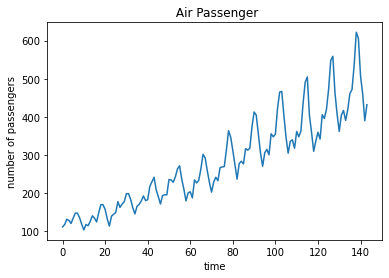

In [108]:
dataset = df.iloc[:,1].values
plt.plot(dataset)
plt.xlabel('time')
plt.ylabel('number of passengers')
plt.title(' Air Passenger')
plt.show()

In [109]:
dataset = dataset.reshape(-1,1)
dataset = dataset.astype('float32')
dataset.shape

(144, 1)

In [110]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
dataset

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [111]:
train_size = int(len(dataset)*0.50)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print('train_size : {}, test_size : {}'.format(len(train),len(test)))

train_size : 72, test_size : 72


In [112]:
timestamp=10
dataX = []
dataY = []
for i in range(len(train)-timestamp-1):
    a = train[i:(i+timestamp),0]
    dataX.append(a)
    dataY.append(train[i+timestamp,0])
trainX = np.array(dataX)
trainY = np.array(dataY)

In [113]:
timestep=10
dataX = []
dataY = []
for i in range(len(test)-timestamp-1):
    a = test[i:(i+timestamp),0]
    dataX.append(a)
    dataY.append(test[i+timestamp,0])
testX = np.array(dataX)
testY = np.array(dataY)

In [114]:
trainX = np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX = np.reshape(testX,(testX.shape[0],1,testX.shape[1]))

In [115]:
model = Sequential()
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1)

Epoch 1/50
61/61 [==============================] - 0s 749us/step - loss: 0.0875
Epoch 2/50
61/61 [==============================] - 0s 798us/step - loss: 0.0467
Epoch 3/50
61/61 [==============================] - 0s 815us/step - loss: 0.0168
Epoch 4/50
61/61 [==============================] - 0s 763us/step - loss: 0.0092
Epoch 5/50
61/61 [==============================] - 0s 748us/step - loss: 0.0073
Epoch 6/50
61/61 [==============================] - 0s 765us/step - loss: 0.0053
Epoch 7/50
61/61 [==============================] - 0s 715us/step - loss: 0.0042
Epoch 8/50
61/61 [==============================] - 0s 715us/step - loss: 0.0053
Epoch 9/50
61/61 [==============================] - 0s 665us/step - loss: 0.0046
Epoch 10/50
61/61 [==============================] - 0s 682us/step - loss: 0.0040
Epoch 11/50
61/61 [==============================] - 0s 814us/step - loss: 0.0054
Epoch 12/50
61/61 [==============================] - 0s 881us/step - loss: 0.0042
Epoch 13/50
61/61 [======